In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from scipy.stats import spearmanr
from scipy.stats import skew, kurtosis, norm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted



import plotly.express as px

In [2]:
def wrangle(filepath):
    # Read CSV file
    df = pd.read_csv(filepath)
    
    # Subset data: Remove outliers for "price"
    low, high = df["price"].quantile([0.1, 0.95])
    mask_area = df["price"].between(low, high)
    df = df[mask_area]
    
    return df

In [3]:
df=wrangle(r"C:\Users\Nassoh\Desktop\DataSienceMyProject\Dubai Houses\Data\Dubai.csv")
print(df.shape)
df.head(5)

(1619, 38)


,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,...,False,False,True,False,False,False,False,False,True,False
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,...,False,False,True,True,False,False,False,False,True,False
2,6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,...,False,True,True,True,False,False,False,True,True,True
3,6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low,...,False,False,False,False,False,False,False,False,False,False
4,6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium,...,False,True,True,True,True,False,False,True,True,False


# Spilt

In [4]:
features = ["size_in_sqft"]
X_train =df[features]
target = "price"
y_train =df[target]

# Baseline

In [5]:
y_mean =y_train.mean()
y_mean
y_pred_baseline =[y_mean]*len(y_train)
len(y_pred_baseline)
mae_baseline =mean_absolute_error(y_train,y_pred_baseline)
print("Mean apt price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price 1708281.7
Baseline MAE: 699702.9


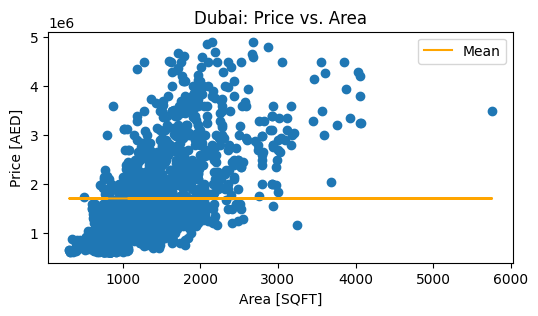

In [6]:
plt.figure(figsize=(6,3))
plt.plot(X_train['size_in_sqft'],y_pred_baseline,color='orange',label='Mean')
plt.scatter(X_train, y_train)
plt.xlabel("Area [SQFT]")
plt.ylabel("Price [AED]")
plt.title("Dubai: Price vs. Area")
plt.legend()
plt.show()


# Build Model

In [7]:
model =LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

# Evaluate

In [8]:
y_pred_training =model.predict(X_train)
mae_training =mean_absolute_error(y_train,y_pred_training)
print("Training MAE:", round(mae_training, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Training MAE: 515316.0
Baseline MAE: 699702.9


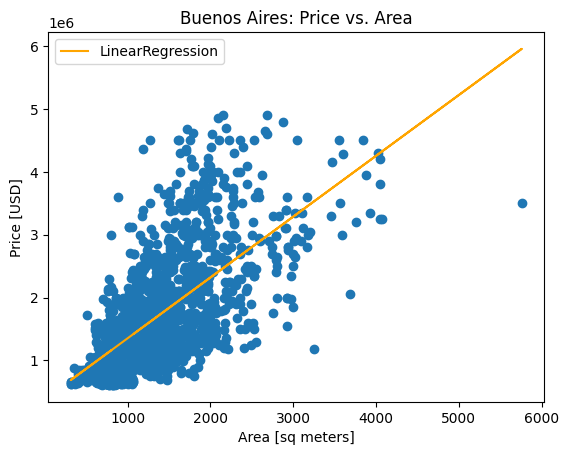

In [9]:
plt.plot(X_train['size_in_sqft'],y_pred_training,color='orange',label='LinearRegression')
plt.scatter(X_train, y_train)
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Buenos Aires: Price vs. Area")
plt.legend()
plt.show()

# Intercept,coefficient and equation For Model

In [10]:
intercept =model.intercept_
print("Model Intercept:", intercept)
coefficient =model.coef_[0]
print('Model coefficient for "surface_covered_in_m2":', coefficient)
print(f"apt_price={intercept}+{coefficient}*surface_covered")


Model Intercept: 383540.12240881496
Model coefficient for "surface_covered_in_m2": 967.7862613897582
apt_price=383540.12240881496+967.7862613897582*surface_covered
